In [1]:
import psutil
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
def get_power_consumption(app_name):
    # find process ID of the app
    pid = None
    for p in psutil.process_iter(['pid', 'name'], 1):
        if app_name.lower() in p.info['name'].lower():
            pid = p.info['pid']
            break

    if pid is None:
        print(f"No process found with the name '{app_name}'.")
        return None
    else:
        # power consumption of the application
        process = psutil.Process(pid)
        cpu_percent = process.cpu_percent(interval=1)
        mem_info = process.memory_info()
        power_consumption = cpu_percent * mem_info.rss / 1000  # mW
        return power_consumption

In [4]:
def measure_power_consumption(app_names, duration):
    # power consumption for each application
    power_values = {}
    for app_name in app_names:
        power_values[app_name] = []
    start_time = time.time()
    while time.time() - start_time < duration:
        for app_name in app_names:
            power_consumption = get_power_consumption(app_name)
            if power_consumption is not None:
                power_values[app_name].append(power_consumption)
        time.sleep(0.1)

    # graph plotting using matplot
    fig, ax = plt.subplots()
    x = np.arange(len(app_names))
    bar_width = 0.35
    opacity = 0.8
    for i, app_name in enumerate(app_names):
        y = [np.mean(power_values[app_name])]
        ax.bar(x[i], y, bar_width, alpha=opacity, label=app_name)
        ax.text(x[i]-bar_width/2, y[0]+5, f"{y[0]:.1f} mW", fontsize=8, ha='center', va='bottom')

    ax.set_xlabel('Application')
    ax.set_ylabel('Power consumption (mW)')
    ax.set_title('Power consumption of applications')
    ax.set_xticks(x)
    ax.set_xticklabels(app_names)
    ax.legend()

    plt.tight_layout()
    plt.show()

/var/folders/31/ny5q5x_n73s191bdnz4v07kc0000gn/T/ipykernel_60068/2034775655.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


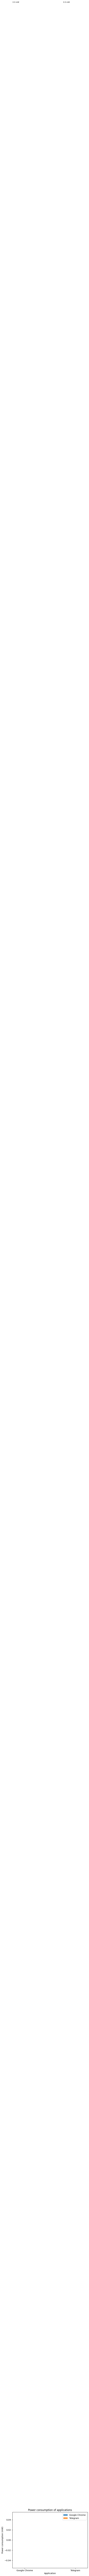

In [5]:
count = 0
choice = ""
app_list = []
while choice != "-1" and count < 2:
    choice = input("Enter an app to compare (-1 to break): ")
    if choice == "-1":
        break
    else:
        count +=1
        app_list.append(choice)

duration = 5  # seconds of runtime for each application
measure_power_consumption(app_list, duration)